In [1]:
# Kaggle.json file path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# dataset
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:09<00:00, 41.3MB/s]
100% 715M/715M [00:09<00:00, 77.6MB/s]


In [3]:
# extract
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [5]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 33.4 MB/s eta 0:00:00


In [6]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [7]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [8]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [9]:
filenames= os.listdir('/content/train')


In [10]:
len(filenames)

50000

In [11]:
print(filenames[0:5])

['36371.png', '38575.png', '6149.png', '40343.png', '45126.png']


In [12]:
# Labels

label_df=pd.read_csv('/content/trainLabels.csv')

In [13]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [14]:
label_df.shape

(50000, 2)

In [15]:
label_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [16]:
label_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

label = [label_dictionary[i] for i in label_df['label']]

print(label_df['label'])
print(label[0:5])

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object
[6, 9, 9, 4, 1]


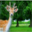

In [17]:
# sample image

import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/4000.png')
cv2_imshow(img)
plt.show()

In [18]:
label_df[label_df['id']==4000]




,id,label
3999,4000,deer


In [19]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [20]:
id_list=list(label_df['id'])
id_list[0:5]

[1, 2, 3, 4, 5]

In [21]:
#image conversion to numpy array


import cv2
import numpy as np

train_folder = '/content/train/'

data = []

for id in id_list:

    image = cv2.imread(train_folder + str(id) + '.png')
    if image is not None:  # Check if the image was loaded successfully
        data.append(image)
    else:
        print(f"Image {id}.png not found or could not be loaded.")


In [22]:
type(data)

list

In [23]:
len(data)

50000

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(32, 32, 3)

In [26]:
# data lists to numpy array(image and label both)

X=np.array(data)
y=np.array(label)

In [27]:
type(X)

numpy.ndarray

In [29]:
print(X.shape)
print(y.shape)


(50000, 32, 32, 3)
(50000,)


In [30]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=3)

In [31]:
print(X_test.shape)

(10000, 32, 32, 3)


In [32]:
#scaling

X_train_scaled=X_train/255

X_test=X_test/255

In [34]:
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [35]:
base=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [38]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))  #upscaling
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(base)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
history=model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 468s 354ms/step - accuracy: 0.3169 - loss: 1.9904 - val_accuracy: 0.5035 - val_loss: 1.3916
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 407s 357ms/step - accuracy: 0.5922 - loss: 1.1835 - val_accuracy: 0.6083 - val_loss: 1.1115
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 402s 357ms/step - accuracy: 0.6632 - loss: 0.9962 - val_accuracy: 0.6015 - val_loss: 1.2145
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 349ms/step - accuracy: 0.7031 - loss: 0.8889 - val_accuracy: 0.6580 - val_loss: 0.9901
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 392s 348ms/step - accuracy: 0.7435 - loss: 0.7816 - val_accuracy: 0.7320 - val_loss: 0.7579
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 357ms/step - accuracy: 0.7735 - loss: 0.6931 - val_accuracy: 0.7090 - val_loss: 0.8916
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 357ms/step - accuracy: 0.7848 - loss: 0.6664 - val_accuracy: 0.6700 - val_loss: 0.9780
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 357ms/step - ac

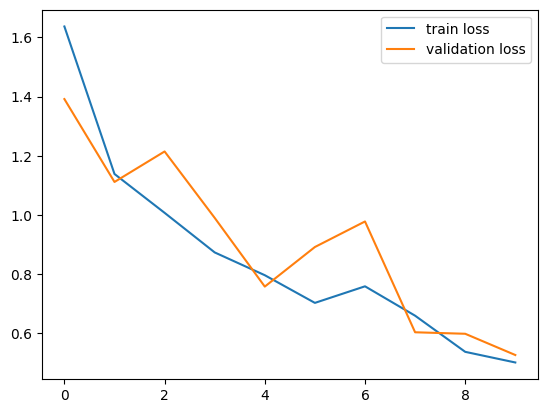

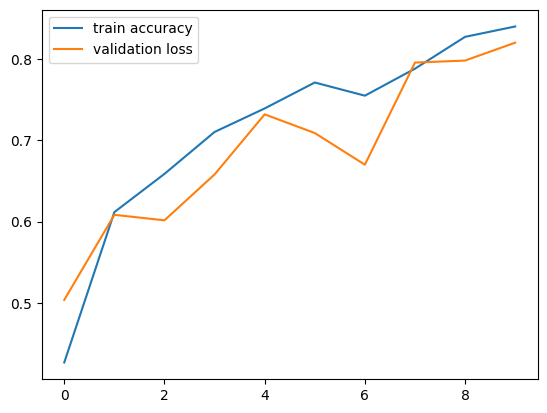

In [42]:
#plots

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation loss')
plt.legend()
plt.show()

In [43]:
from tensorflow.keras.applications import DenseNet121
dense_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
dense_base.summary()



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 64, 64, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 64, 64, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 64, 64, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [44]:
model_densenet = models.Sequential()
model_densenet.add(layers.UpSampling2D((2, 2)))  # Upscale
model_densenet.add(layers.UpSampling2D((2, 2)))
model_densenet.add(layers.UpSampling2D((2, 2)))

model_densenet.add(dense_base)
model_densenet.add(Flatten())
model_densenet.add(BatchNormalization())
model_densenet.add(Dense(128, activation='relu'))
model_densenet.add(Dropout(0.5))
model_densenet.add(BatchNormalization())
model_densenet.add(Dense(64, activation='relu'))
model_densenet.add(Dropout(0.5))
model_densenet.add(BatchNormalization())
model_densenet.add(Dense(10, activation='softmax'))

In [45]:
model_densenet.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history_densenet=model_densenet.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 584s 370ms/step - accuracy: 0.4069 - loss: 1.7405 - val_accuracy: 0.6192 - val_loss: 1.2092
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 399s 355ms/step - accuracy: 0.7104 - loss: 0.9109 - val_accuracy: 0.6702 - val_loss: 1.0796
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 354ms/step - accuracy: 0.7732 - loss: 0.7293 - val_accuracy: 0.7713 - val_loss: 0.6488
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 452s 363ms/step - accuracy: 0.8039 - loss: 0.6217 - val_accuracy: 0.7115 - val_loss: 0.9081
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 362ms/step - accuracy: 0.8316 - loss: 0.5434 - val_accuracy: 0.7912 - val_loss: 0.6169
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 431s 352ms/step - accuracy: 0.8479 - loss: 0.4918 - val_accuracy: 0.8415 - val_loss: 0.4837
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 353ms/step - accuracy: 0.8666 - loss: 0.4466 - val_accuracy: 0.8397 - val_loss: 0.4780
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 440s 351ms/step - ac

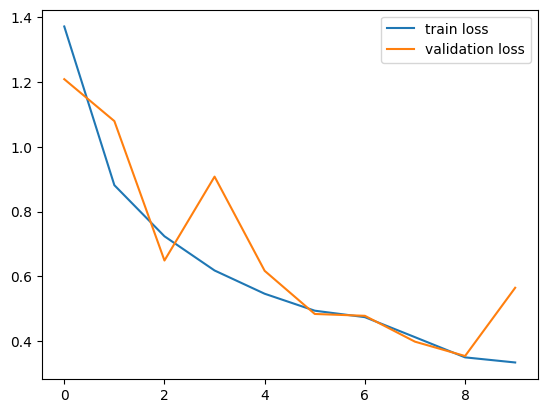

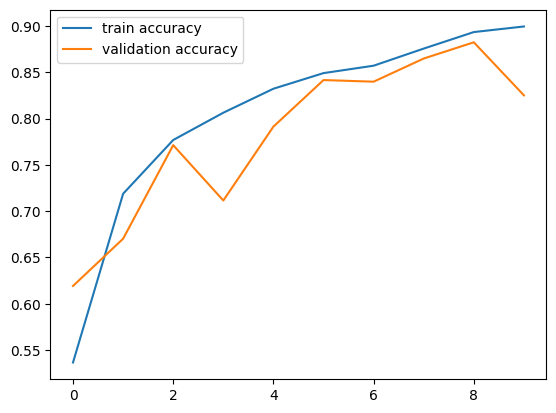

In [50]:
#plots

plt.plot(history_densenet.history['loss'], label='train loss')
plt.plot(history_densenet.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history_densenet.history['accuracy'], label='train accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()